#### installs and imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 86 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#root = '/content/drive/My Drive/Spatial Analytics/Final Project/'
root = '/content/drive/My Drive/Colab Notebooks/CYPLAN257 Final Project/'

Mounted at /content/drive


#### distance to subway entrances data

In [ ]:
# merge distance information 
# contains distance between every NTA & subway entrances
NTA_Dist_Subway = pd.read_csv(root+"census_nta_all_subs_dist.csv")

In [ ]:
NTA_Dist_Subway.head()

,Unnamed: 0,the_geom,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,...,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932
0,0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316915,7.741275e+07,MULTIPOLYGON (((-73.75205066516907 40.70522802...,...,0.210467,0.210520,0.207166,0.207298,0.207397,0.207838,0.206413,0.206461,0.206117,0.206591
1,1,MULTIPOLYGON (((-73.95337017508862 40.68064050...,3,Brooklyn,47,BK69,Clinton Hill,23971.466236,2.052820e+07,MULTIPOLYGON (((-73.95337017508862 40.68064050...,...,0.079126,0.078966,0.090526,0.090556,0.090414,0.088736,0.097278,0.097076,0.096079,0.096044
2,2,MULTIPOLYGON (((-73.97074691395932 40.62562949...,3,Brooklyn,47,BK46,Ocean Parkway South,21975.996742,1.778210e+07,MULTIPOLYGON (((-73.97074691395932 40.62562949...,...,0.150118,0.149953,0.161623,0.161653,0.161512,0.159835,0.168342,0.168141,0.167144,0.167118
3,3,MULTIPOLYGON (((-73.8870514253612 40.884349575...,2,Bronx,5,BX28,Van Cortlandt Village,21945.719584,2.566612e+07,MULTIPOLYGON (((-73.8870514253612 40.884349575...,...,0.126734,0.126928,0.113335,0.113356,0.113545,0.115482,0.105967,0.106198,0.107117,0.107328
4,4,MULTIPOLYGON (((-73.80576840191371 40.68293239...,4,Queens,81,QN55,South Ozone Park,36708.169293,8.246139e+07,MULTIPOLYGON (((-73.80576840191371 40.68293239...,...,0.166926,0.166939,0.166514,0.166640,0.166696,0.166703,0.167450,0.167443,0.166892,0.167310


In [ ]:
cols1 = NTA_Dist_Subway.columns[10:].to_list()
cols2 = NTA_Dist_Subway.columns[2:7].to_list()
rel_cols = cols2 + cols1
NTA_Dist_Subway_subset = NTA_Dist_Subway[rel_cols]
NTA_Dist_Subway_subset.columns

Index(['BoroCode', 'BoroName', 'CountyFIPS', 'NTACode', 'NTAName', '1734',
       '1735', '1736', '1737', '1738',
       ...
       '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931',
       '1932'],
      dtype='object', length=1933)

#### demographic data

In [ ]:
### import data created by Siddharth involving race, gender etc.
# import from drive
NTA_demographics_full = pd.read_csv(root+"nta_demographics.csv")
NTA_demographics_full = NTA_demographics_full.rename(columns={'Unnamed: 0':'NTACode'})
NTA_demographics_full.head()


,NTACode,Total population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,White,Black or African American,Asian,Hispanic or Latino (of any race)
0,BK72,32828,16820,16008,6163,3773,3620,3279,3064,3960,2416,2161,1306,987,796,770,30366,913,30,3779
1,BK73,46070,22290,23780,3017,2480,2315,2361,4123,13445,7162,4860,1684,1405,1683,1014,36143,2605,2048,17189
2,BK76,31522,15499,16023,937,878,914,879,2653,10463,4465,4068,2045,1519,1314,986,26941,304,1577,4725
3,BK90,33155,15587,17568,1341,913,1342,1460,3038,9522,4605,3482,1575,1450,2128,1741,20732,3455,3951,10927
4,BK09,23498,11805,11693,1538,543,547,1109,1464,5809,4242,2564,1446,1355,1610,854,18810,1282,1713,1747


In [ ]:
NTA_demographics_full['White_Prop'] = NTA_demographics_full['White']/NTA_demographics_full['Total population']
NTA_demographics_full['AfAm_Prop'] = NTA_demographics_full['Black or African American']/NTA_demographics_full['Total population']
NTA_demographics_full['Asian_Prop'] = NTA_demographics_full['Asian']/NTA_demographics_full['Total population']
NTA_demographics_full['Hispanic_Latino_Prop'] = NTA_demographics_full['Hispanic or Latino (of any race)']/NTA_demographics_full['Total population']


In [ ]:
NTA_demographics_full['Male_Prop'] = NTA_demographics_full['Male']/NTA_demographics_full['Total population']
NTA_demographics_full['Female_Prop'] = NTA_demographics_full['Female']/NTA_demographics_full['Total population']
NTA_demographics_full['Children_Prop'] = (NTA_demographics_full['Under 5 years']+NTA_demographics_full['5 to 9 years']
                                          + NTA_demographics_full['10 to 14 years']+NTA_demographics_full['15 to 19 years'])/NTA_demographics_full['Total population']
NTA_demographics_full['Adult_Prop'] = (NTA_demographics_full['20 to 24 years']+NTA_demographics_full['25 to 34 years']
                                          + NTA_demographics_full['35 to 44 years']+NTA_demographics_full['45 to 54 years'])/NTA_demographics_full['Total population']
NTA_demographics_full['Old_Prop'] = (NTA_demographics_full['55 to 59 years']+NTA_demographics_full['60 to 64 years']
                                          + NTA_demographics_full['65 to 74 years']+NTA_demographics_full['75 to 84 years'])/NTA_demographics_full['Total population']


In [ ]:
# remove cols
# cols_remove = ['White','Black or African American','Asian','Hispanic or Latino (of any race)']
cols_remove = ['Male', 'Female', 'Under 5 years',
       '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years',
       '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years',
       '60 to 64 years', '65 to 74 years', '75 to 84 years']
NTA_demographics_full = NTA_demographics_full.drop(columns = cols_remove)

In [ ]:
NTA_demographics_full.head()

,NTACode,Total population,White,Black or African American,Asian,Hispanic or Latino (of any race),White_Prop,AfAm_Prop,Asian_Prop,Hispanic_Latino_Prop,Male_Prop,Female_Prop,Children_Prop,Adult_Prop,Old_Prop
0,BK72,32828,30366,913,30,3779,0.925003,0.027812,0.000914,0.115115,0.512367,0.487633,0.512824,0.353387,0.117552
1,BK73,46070,36143,2605,2048,17189,0.784524,0.056544,0.044454,0.373106,0.483829,0.516171,0.220816,0.642283,0.125591
2,BK76,31522,26941,304,1577,4725,0.854673,0.009644,0.050029,0.149895,0.491688,0.508312,0.114460,0.686790,0.186029
3,BK90,33155,20732,3455,3951,10927,0.625305,0.104208,0.119168,0.329573,0.470125,0.529875,0.152496,0.622742,0.207932
4,BK09,23498,18810,1282,1713,1747,0.800494,0.054558,0.072900,0.074347,0.502383,0.497617,0.159035,0.599157,0.224062


In [ ]:
# remove nan
NTA_demographics_full.dropna(inplace=True)

#### merged data

In [ ]:
# merge with 'merged_NTA'
NTA_input_data = NTA_demographics_full.merge(NTA_Dist_Subway_subset,on='NTACode',how='inner')
# remove last row
NTA_input_data.drop(NTA_input_data.tail(1).index,inplace=True) # drop last n rows


#### feature processing and create input data for clustering

In [ ]:
def transform_data(df):
    # for further studying the results, you will need original data
    df_original = df.copy()

    # df_transformed = _standardize_features(df_transformed)
    df_transformed = _scale_features(df_original)

    return df_transformed

def _standardize_features(df):
    # log transform is one of the possible ways to standardize data
    skewed_features = ['col_1', 'col_2']
    for feature in skewed_features:
        # Transform Skewed Data
        df[feature] = np.log(df[feature])

    return df


def _scale_features(df):
    # min_max scaler is a way to get data in the range 0 to 1
    # if you need -1 1 range, use StandardScaler
    standard_scaler = StandardScaler()
    # standardization 
    scale = standard_scaler.fit_transform(df) 
    return scale

In [ ]:
dist_cols = NTA_input_data.columns[19:].to_list()
pop_col = NTA_input_data.columns[1:2].to_list()
cols_new = pop_col + dist_cols
cols_new2 = cols_new[1:]

#### reduce distance dimensions, keep others as it is

# get distance data
cluster_input_distance = NTA_input_data[cols_new2]
# normalize this distance data 
cluster_transform = transform_data(cluster_input_distance)
# and apply PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
numpy_arr_1 = pca.fit_transform(cluster_transform)

# get demo data
cols_demo = ['Total population', 'White_Prop', 'AfAm_Prop', 'Asian_Prop',
       'Hispanic_Latino_Prop', 'Male_Prop', 'Female_Prop', 'Children_Prop',
       'Adult_Prop','Old_Prop']
cluster_input_demo = NTA_input_data[cols_demo]
cluster_transform_demo = transform_data(cluster_input_demo)


# merge the two mp arrays; this will go as input to the cluster
cluster_input_arr = np.hstack((numpy_arr_1,cluster_transform_demo))

In [ ]:
cluster_input_arr.shape

(192, 13)

In [ ]:
df_X_reduced = pd.DataFrame(cluster_input_arr, index=NTA_input_data.NTACode)
df_X_reduced.reset_index(inplace=True)
df_X_reduced

,NTACode,0,1,2,3,4,5,6,7,8,9,10,11,12
0,BK72,-42.225309,15.101315,-0.575477,-0.434981,1.701310,-0.815367,-0.884397,-0.781514,0.737769,-0.737769,3.881891,-2.482919,-1.755937
1,BK73,-44.112211,11.767325,1.710007,0.161906,1.195435,-0.708214,-0.577746,0.436103,0.129836,-0.129836,-0.319413,1.779301,-1.613908
2,BK76,-44.302177,5.133982,2.316009,-0.493849,1.448047,-0.883119,-0.538486,-0.617365,0.297258,-0.297258,-1.849628,2.435929,-0.546189
3,BK90,-40.772959,6.910008,-4.231283,-0.420241,0.622082,-0.530465,-0.051546,0.230645,-0.162084,0.162084,-1.302379,1.490992,-0.159227
4,BK09,-38.035985,23.784599,7.404405,-0.855534,1.252945,-0.715623,-0.377406,-0.973924,0.525081,-0.525081,-1.208299,1.143041,0.125720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,SI01,100.563366,40.274767,27.847551,-0.619835,1.793876,-0.906492,-0.659886,-0.931662,0.641531,-0.641531,-0.056164,-0.436712,0.728021
188,SI11,122.416856,39.605065,33.616156,-0.829165,1.555992,-0.783899,-0.585522,-0.742969,0.871911,-0.871911,0.499698,-0.028578,-0.404707
189,SI25,59.885150,39.844047,19.268121,-0.921344,1.700130,-0.817383,-0.742867,-0.749584,-0.096952,0.096952,-0.253048,-1.046234,1.439713
190,SI32,105.283838,39.462161,30.559336,-1.016002,1.720326,-0.897387,-0.500502,-0.981576,0.257425,-0.257425,0.117431,-0.479707,0.629594


#### Clustering

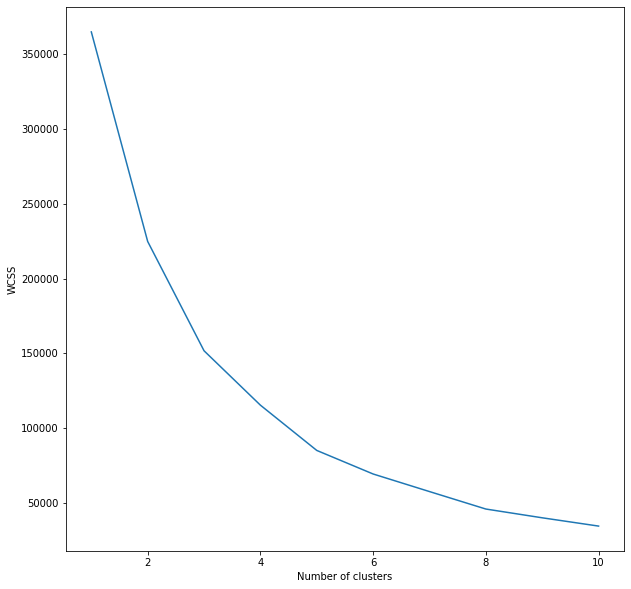

In [ ]:
# elbow for value of k
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(cluster_input_arr)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# 3-5 good number of clusters

<ipython-input-19-2781e83f24ce>:13: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  plt.scatter(cluster_input_arr[:,0],cluster_input_arr[:,2], c= label_color, alpha=0.5)


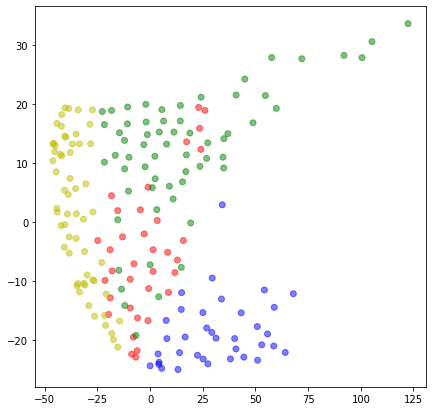

In [ ]:
# Set a 5 KMeans clustering 
kmeans = KMeans(n_clusters=5)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(cluster_input_arr)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'Y',4:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram 
# - PC1 vs PC3
plt.figure(figsize = (7,7))
plt.scatter(cluster_input_arr[:,0],cluster_input_arr[:,2], c= label_color, alpha=0.5) 
plt.show()

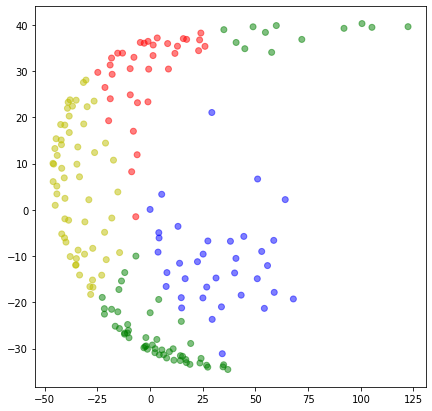

In [ ]:
# Plot the scatter digram 
# - PC1 vs PC2
plt.figure(figsize = (7,7))
plt.scatter(cluster_input_arr[:,0],cluster_input_arr[:,1], c= label_color, alpha=0.5) 
plt.show()

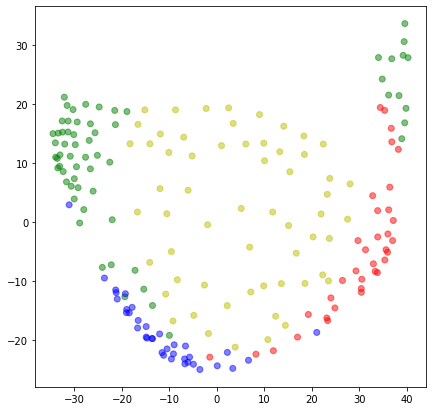

In [ ]:
# Plot the scatter digram 
# - PC2 vs PC3
plt.figure(figsize = (7,7))
plt.scatter(cluster_input_arr[:,1],cluster_input_arr[:,2], c= label_color, alpha=0.5) 
plt.show()

In [ ]:
NTA_input_data.columns[3:]

Index(['Black or African American', 'Asian',
       'Hispanic or Latino (of any race)', 'White_Prop', 'AfAm_Prop',
       'Asian_Prop', 'Hispanic_Latino_Prop', 'Male_Prop', 'Female_Prop',
       'Children_Prop',
       ...
       '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931',
       '1932'],
      dtype='object', length=1944)

In [ ]:
# df_X_reduced.reset_index()
df_X_reduced.loc[:,'population'] = NTA_input_data.loc[:,'Total population']
df_X_reduced[['White_Prop']] = NTA_input_data[['White_Prop']]
df_X_reduced[['AfAm_Prop']] = NTA_input_data[['AfAm_Prop']]
df_X_reduced[['Asian_Prop']] = NTA_input_data[['Asian_Prop']]
df_X_reduced[['Hispanic_Latino_Prop']] = NTA_input_data[['Hispanic_Latino_Prop']]
df_X_reduced[['Male_Prop']] = NTA_input_data[['Male_Prop']]
df_X_reduced[['Female_Prop']] = NTA_input_data[['Female_Prop']]
df_X_reduced[['Children_Prop']] = NTA_input_data[['Children_Prop']]
df_X_reduced[['Adult_Prop']] = NTA_input_data[['Adult_Prop']]
df_X_reduced[['Old_Prop']] = NTA_input_data[['Old_Prop']]


df_X_reduced[['NTAName']] = NTA_input_data[['NTAName']]
df_X_reduced[['BoroName']] = NTA_input_data[['BoroName']]
df_X_reduced['Cluster'] = kmeans.labels_
df_X_reduced["Cluster"] = df_X_reduced["Cluster"].astype(str)

In [ ]:
df_X_reduced.Cluster.value_counts()

0    52
2    49
4    41
1    34
3    16
Name: Cluster, dtype: int64

In [ ]:
df_X_reduced.to_excel('/content/drive/My Drive/Colab Notebooks/CYPLAN257 Final Project/nta_w_clusters.xlsx')

In [ ]:
df_X_reduced

,NTACode,0,1,2,3,4,5,6,7,8,...,Asian_Prop,Hispanic_Latino_Prop,Male_Prop,Female_Prop,Children_Prop,Adult_Prop,Old_Prop,NTAName,BoroName,Cluster
0,BK72,-42.225309,15.101315,-0.575477,-0.434981,1.701310,-0.815367,-0.884397,-0.781514,0.737769,...,0.000914,0.115115,0.512367,0.487633,0.512824,0.353387,0.117552,Williamsburg,Brooklyn,0
1,BK73,-44.112211,11.767325,1.710007,0.161906,1.195435,-0.708214,-0.577746,0.436103,0.129836,...,0.044454,0.373106,0.483829,0.516171,0.220816,0.642283,0.125591,North Side-South Side,Brooklyn,0
2,BK76,-44.302177,5.133982,2.316009,-0.493849,1.448047,-0.883119,-0.538486,-0.617365,0.297258,...,0.050029,0.149895,0.491688,0.508312,0.114460,0.686790,0.186029,Greenpoint,Brooklyn,0
3,BK90,-40.772959,6.910008,-4.231283,-0.420241,0.622082,-0.530465,-0.051546,0.230645,-0.162084,...,0.119168,0.329573,0.470125,0.529875,0.152496,0.622742,0.207932,East Williamsburg,Brooklyn,0
4,BK09,-38.035985,23.784599,7.404405,-0.855534,1.252945,-0.715623,-0.377406,-0.973924,0.525081,...,0.072900,0.074347,0.502383,0.497617,0.159035,0.599157,0.224062,Brooklyn Heights-Cobble Hill,Brooklyn,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,SI01,100.563366,40.274767,27.847551,-0.619835,1.793876,-0.906492,-0.659886,-0.931662,0.641531,...,0.032791,0.083301,0.507850,0.492150,0.239113,0.492081,0.258154,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,3
188,SI11,122.416856,39.605065,33.616156,-0.829165,1.555992,-0.783899,-0.585522,-0.742969,0.871911,...,0.043350,0.123282,0.518665,0.481335,0.277748,0.519744,0.194037,Charleston-Richmond Valley-Tottenville,Staten Island,3
189,SI25,59.885150,39.844047,19.268121,-0.921344,1.700130,-0.817383,-0.742867,-0.749584,-0.096952,...,0.021009,0.121880,0.473183,0.526817,0.225429,0.450767,0.298439,Oakwood-Oakwood Beach,Staten Island,3
190,SI32,105.283838,39.462161,30.559336,-1.016002,1.720326,-0.897387,-0.500502,-0.981576,0.257425,...,0.055422,0.072725,0.489818,0.510182,0.251179,0.489166,0.252583,Rossville-Woodrow,Staten Island,3


In [ ]:
# boroghs in Cluster2
df_X_reduced[df_X_reduced.Cluster=='2']['BoroName'].value_counts(normalize=True)
# df_X_reduced.Cluster.value_counts()

Queens    0.972222
Bronx     0.027778
Name: BoroName, dtype: float64

In [ ]:
df_X_reduced[df_X_reduced.Cluster=='0']['BoroName'].value_counts(normalize=True)

Brooklyn         0.828571
Staten Island    0.142857
Queens           0.028571
Name: BoroName, dtype: float64

In [ ]:
df_X_reduced[df_X_reduced.Cluster=='1']['BoroName'].value_counts(normalize=True)


Staten Island    1.0
Name: BoroName, dtype: float64

In [ ]:
df_X_reduced[df_X_reduced.Cluster=='3']['BoroName'].value_counts(normalize=True)


Manhattan    0.389831
Brooklyn     0.372881
Queens       0.237288
Name: BoroName, dtype: float64

In [ ]:
df_X_reduced[df_X_reduced.Cluster=='4']['BoroName'].value_counts(normalize=True)


Bronx        0.74
Queens       0.14
Manhattan    0.12
Name: BoroName, dtype: float64

In [ ]:
# afam prop

print(df_X_reduced[df_X_reduced.Cluster=='0']['AfAm_Prop'].mean())
print(df_X_reduced[df_X_reduced.Cluster=='1']['AfAm_Prop'].mean())
print(df_X_reduced[df_X_reduced.Cluster=='2']['AfAm_Prop'].mean())
print(df_X_reduced[df_X_reduced.Cluster=='3']['AfAm_Prop'].mean())
print(df_X_reduced[df_X_reduced.Cluster=='4']['AfAm_Prop'].mean())


0.24184183428189132
0.06256282759126824
0.30753505270500253
0.2023662736525253
0.3018497191959778


In [ ]:
# old prop

print(df_X_reduced[df_X_reduced.Cluster=='0']['Old_Prop'].mean())
print(df_X_reduced[df_X_reduced.Cluster=='1']['Old_Prop'].mean())
print(df_X_reduced[df_X_reduced.Cluster=='2']['Old_Prop'].mean())
print(df_X_reduced[df_X_reduced.Cluster=='3']['Old_Prop'].mean())
print(df_X_reduced[df_X_reduced.Cluster=='4']['Old_Prop'].mean())

0.23741175685880067
0.24399800369904104
0.2457555549518309
0.20516864317478206
0.18927945829894863


In [ ]:
# plotly plot
## X-axis: PC1, Y-Axis: Population

import plotly.express as px
import sklearn.cluster as cluster
# text = "Number Column: " + df["Number Column"].astype(str) + "<br>Mean Age: " + df["Mean Age"].astype(str),
fig = px.scatter(df_X_reduced, x=0, y=1, color='Cluster', size='population',
                 hover_data=['NTACode','population','White_Prop','AfAm_Prop','Asian_Prop','Hispanic_Latino_Prop','Male_Prop','Female_Prop',
                             'Children_Prop','Adult_Prop','Old_Prop',
                             'BoroName','NTAName'],
                 labels={'0': "PC 1",
                     '1': "PC 2"},                
                  color_discrete_sequence=["red", "green", "blue", "magenta","orange"])
fig.show()
fig.write_html(root+"/"+"PC_1_PC_2_Scatter.html")
import plotly.io as pio
pio.write_image(fig, root+"/"+"PC_1_PC_2_Scatter.png", width=700, height=775)

# fig.write_image(root+"/"+"0_2.png")


In [ ]:
# SSN replicating:
# plotly plot
## X-axis: PC1, Y-Axis: Population

import plotly.express as px
import sklearn.cluster as cluster
# text = "Number Column: " + df["Number Column"].astype(str) + "<br>Mean Age: " + df["Mean Age"].astype(str),
fig = px.scatter(df_X_reduced, x=0, y=1, color='Cluster', size='population',
                 hover_data=['NTACode','population','White_Prop','AfAm_Prop','Asian_Prop','Hispanic_Latino_Prop','Male_Prop','Female_Prop',
                             'Children_Prop','Adult_Prop','Old_Prop',
                             'BoroName','NTAName'],
                 labels={'0': "PC 1",
                     '1': "PC 2"},                
                  color_discrete_sequence=["red", "green", "blue", "magenta","orange"])
fig.show()
fig.write_html(root+"/"+"PC_1_PC_2_Scatter.html")
import plotly.io as pio
pio.write_image(fig, root+"/"+"PC_1_PC_2_Scatter.png", width=700, height=700)

# fig.write_image(root+"/"+"0_2.png")


In [ ]:
# plotly plot
## X-axis: PC1, Y-Axis: Population

import plotly.express as px
import sklearn.cluster as cluster
# text = "Number Column: " + df["Number Column"].astype(str) + "<br>Mean Age: " + df["Mean Age"].astype(str),
fig = px.scatter(df_X_reduced, x=0, y=3, color='Cluster', size='population',
                 hover_data=['NTACode','population','White_Prop','AfAm_Prop','Asian_Prop','Hispanic_Latino_Prop','Male_Prop','Female_Prop',
                             'Children_Prop','Adult_Prop','Old_Prop',
                             'BoroName','NTAName'],
                 labels={'0': "PC 1",
                     '3': "Population"},                
                  color_discrete_sequence=["red", "green", "blue", "magenta","orange"])
fig.show()
fig.write_html(root+"/"+"PCA_1_African_American_Scatter.html")
# fig.write_image(root+"/"+"0_2.png")


In [ ]:
# plotly plot
## X-axis: PC1, Y-Axis:Afam prop

import plotly.express as px
import sklearn.cluster as cluster
# text = "Number Column: " + df["Number Column"].astype(str) + "<br>Mean Age: " + df["Mean Age"].astype(str),
fig = px.scatter(df_X_reduced, x=0, y=5, color='Cluster', size='population',
                 hover_data=['NTACode','population','White_Prop','AfAm_Prop','Asian_Prop','Hispanic_Latino_Prop','Male_Prop','Female_Prop',
                             'Children_Prop','Adult_Prop','Old_Prop',
                             'BoroName','NTAName'],
                 labels={'0': "PC 1",
                     '5': "African American Proportion"},                
                  color_discrete_sequence=["red", "green", "blue", "magenta","orange"])
fig.show()
fig.write_html(root+"/"+"PCA_1_African_American_Scatter.html")
# fig.write_image(root+"/"+"0_2.png")


In [ ]:
# plotly plot
## X-axis: PC1, Y-Axis:Asian prop

import plotly.express as px
import sklearn.cluster as cluster
# text = "Number Column: " + df["Number Column"].astype(str) + "<br>Mean Age: " + df["Mean Age"].astype(str),
fig = px.scatter(df_X_reduced, x=0, y=6, color='Cluster', size='population',
                 hover_data=['NTACode','population','White_Prop','AfAm_Prop','Asian_Prop','Hispanic_Latino_Prop','Male_Prop','Female_Prop',
                             'Children_Prop','Adult_Prop','Old_Prop',
                             'BoroName','NTAName'],
                 labels={'0': "PC 1",
                     '6': "Asian Proportion"},                
                  color_discrete_sequence=["red", "green", "blue", "magenta","orange"])
fig.show()
# fig.write_html(root+"/"+"PCA_0_2.html")
# fig.write_image(root+"/"+"0_2.png")


In [ ]:
# plotly plot
## X-axis: PC1, Y-Axis:Asian prop

import plotly.express as px
import sklearn.cluster as cluster
# text = "Number Column: " + df["Number Column"].astype(str) + "<br>Mean Age: " + df["Mean Age"].astype(str),
fig = px.scatter(df_X_reduced, x=0, y=12, color='Cluster', size='population',
                 hover_data=['NTACode','population','White_Prop','AfAm_Prop','Asian_Prop','Hispanic_Latino_Prop','Male_Prop','Female_Prop',
                             'Children_Prop','Adult_Prop','Old_Prop',
                             'BoroName','NTAName'],
                 labels={'0': "PC 1",
                     '12': "Old Proportion"},                
                  color_discrete_sequence=["red", "green", "blue", "magenta","orange"])
fig.show()
fig.write_html(root+"/"+"PCA_1_Old_Population_Scatter.html")
# fig.write_image(root+"/"+"0_2.png")
